In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Nifty 50 Historical Data - Cleaned.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2016-01-27,7437.75,7469.60,7477.90,7419.70,193390000.0,0.02
1,2016-01-28,7424.65,7426.50,7468.85,7409.60,283040000.0,-0.18
2,2016-01-29,7563.55,7413.35,7575.65,7402.80,307930000.0,1.87
3,2016-02-01,7555.95,7589.50,7600.45,7541.25,206640000.0,-0.10
4,2016-02-02,7455.55,7566.65,7576.30,7428.05,237340000.0,-1.33


In [4]:
df['Daily_Return'] = df['Price'].pct_change()

### Cumulative Returns

In [7]:
df['Cumulative Return'] = (1 + df['Daily_Return']).cumprod()

In [11]:
df[['Date','Daily_Return','Cumulative Return']].head()

,Date,Daily_Return,Cumulative Return
0,2016-01-27,NaN,NaN
1,2016-01-28,-0.001761,0.998239
2,2016-01-29,0.018708,1.016914
3,2016-02-01,-0.001005,1.015892
4,2016-02-02,-0.013288,1.002393


### Compute Drawdowns

In [16]:
df['Rolling_Max'] = df['Cumulative Return'].cummax()

df['Drawdown'] = df['Cumulative Return'] / df['Rolling_Max'] - 1

### Maximum Drawdown

In [19]:
max_drawdown = df['Drawdown'].min()
max_drawdown

-0.3843985342533345

### Underwater Plot

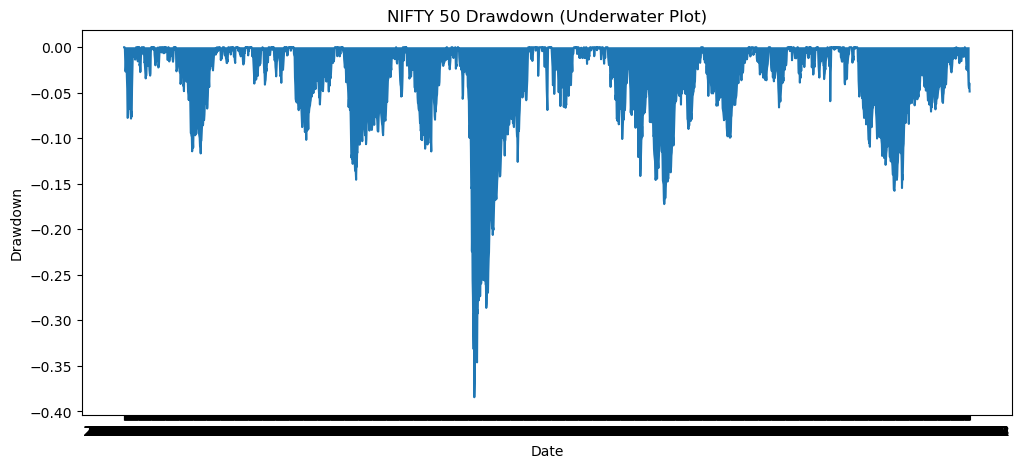

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Drawdown'])
plt.fill_between(df['Date'], df['Drawdown'], 0)

plt.title('NIFTY 50 Drawdown (Underwater Plot)')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.show()

In [24]:
df.sort_values('Drawdown').head(5)[['Date', 'Drawdown']]

,Date,Drawdown
1026,2020-03-23,-0.384399
1027,2020-03-24,-0.368965
1034,2020-04-03,-0.346093
1033,2020-04-01,-0.332341
1024,2020-03-19,-0.331560


### Time to Recovery

In [31]:
df['Recovered'] = df['Cumulative Return'] >= df['Rolling_Max']

In [33]:
recovery_days = (
    df['Recovered']
    .astype(int)
    .groupby((df['Recovered'] != df['Recovered'].shift()).cumsum())
    .cumsum()
)

recovery_days.max()

7

### Drawdown Statistics Summary

In [37]:
drawdown_summary = pd.DataFrame({
    'Metric': ['Maximum Drawdown'],
    'Value': [max_drawdown]
})

drawdown_summary

,Metric,Value
0,Maximum Drawdown,-0.384399
